# 1970년대 보스턴 지역의 주택 가격 예측 => 회귀

In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777) # load_data 함수에서는
                                                          #  seed라는 것을 활용함

57344/57026 [==============================] - 0s 0us/step


# 데이터 형태 확인하기

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


# 데이터 전처리 및 검증 데이터셋 만들기

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)

print(x_train[0])

[  0.25199   0.       10.59      0.        0.489     5.783    72.7
   4.3549    4.      277.       18.6     389.43     18.06   ]


In [ ]:

# ↑ ↓ 표준화 전후 비교

# 데이터 전처리 -> 표준화(Standardization)

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

# (데이터[훈련, 테스트 데이터 모두] - 평균) / 표준편차(Standardization)
x_train = (x_train - mean)/std
x_test = (x_test-mean)/std

print(x_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


In [ ]:
# 검증 데이터셋을 만듭니다
from sklearn.model_selection import  train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,             # 독립 변수
                                                   y_train,             # 종속변수
                                                   test_size=0.33, # 검증 33%
                                                   random_state=777) # 랜덤 추출 값

# !!! 데이터 수가 부족하면 validation 안 해도 됨!!!

In [ ]:
print(x_train.shape, x_val.shape)

(270, 13) (134, 13)


# 모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # 하나의 값을 출력 -> 주택가격

# 활성화 함수를 안 적은 이유는 리니어가 디폴트이기 때문에 안 적어도 작동 됨

# 모델 설정하기

In [ ]:
# 실제 집값: mae
# mse 평균 제곱의 x
model.compile(optimizer = 'adam', loss='mse', metrics=['mae', 'mse'])

# 모델 학습하기

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=300,   # 몇 번 공부시킬건지?
                    validation_data = (x_val, y_val)) # 어떻게 나눠서 공부시킬건지?

Epoch 1/300
9/9 [==============================] - 1s 24ms/step - loss: 545.4448 - mae: 21.5773 - mse: 545.4448 - val_loss: 599.4087 - val_mae: 22.0986 - val_mse: 599.4087
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 523.5161 - mae: 21.0330 - mse: 523.5161 - val_loss: 576.4345 - val_mae: 21.5321 - val_mse: 576.4345
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 502.0840 - mae: 20.4521 - mse: 502.0840 - val_loss: 552.2003 - val_mae: 20.9140 - val_mse: 552.2003
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 478.3047 - mae: 19.8107 - mse: 478.3047 - val_loss: 523.9074 - val_mae: 20.1603 - val_mse: 523.9074
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 448.7469 - mae: 19.0176 - mse: 448.7469 - val_loss: 489.0296 - val_mae: 19.2081 - val_mse: 489.0296
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 412.6314 - mae: 18.0294 - mse: 412.6314 - val_loss: 445.3404 - val_mae: 1

# 모델 결과 그리기

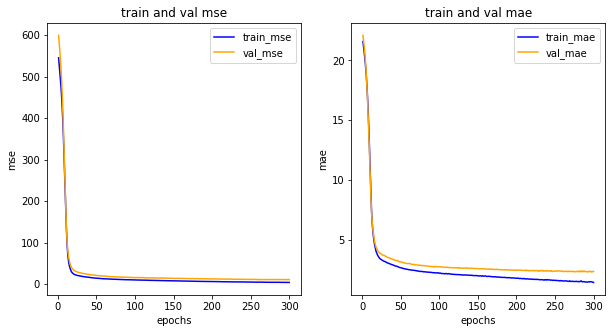

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()


# 모델 평가하기

In [ ]:
model.evaluate(x_test, y_test) #mae 2.0 -> 실제 집값과 2,000달러 정도 차이

4/4 [==============================] - 0s 3ms/step - loss: 9.3832 - mae: 2.2310 - mse: 9.3832


[9.383197784423828, 2.23103404045105, 9.383197784423828]

# 모델 예측하기

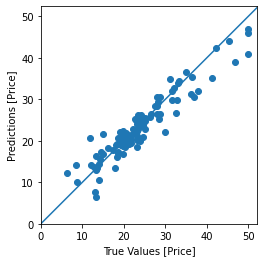

In [ ]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# 추세선 아래 있는 것들은 실제 값보다 낮게 예측
# 추세선 위에 있는 것들은 실제 값보다 높게 예측
# 추세선과 일치하는 값들은 오차율 0